In [1]:
!pip install dlib

In [4]:
import numpy as np
import cv2
import dlib
import os
from imutils import face_utils
from google.colab import drive
from google.colab import drive
from google.colab.patches import cv2_imshow

In [35]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
path = '/content/drive/MyDrive/Test_opencv'
os.listdir(path)

['dataimage_40.jpg',
 'dataimage_60.jpg',
 'dataimage_100.jpg',
 'dataimage_80.jpg',
 'dataimage_160.jpg',
 'dataimage_140.jpg',
 'dataimage_180.jpg',
 'dataimage_200.jpg',
 'dataimage_240.jpg',
 'dataimage_260.jpg',
 'dataimage_280.jpg',
 'face.jpg',
 'models',
 '27.ipynb']

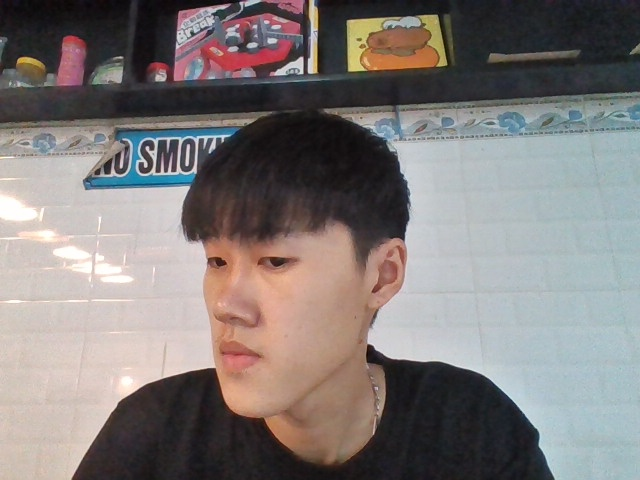

In [37]:
img = cv2.imread(path + '/face.jpg')
cv2_imshow(img)

(1, 1, 200, 7)
[0.         1.         0.9948197  0.30911085 0.3726991  0.5650059
 0.85329664]
[0.30911085 0.3726991  0.5650059  0.85329664]
197 178 361 409


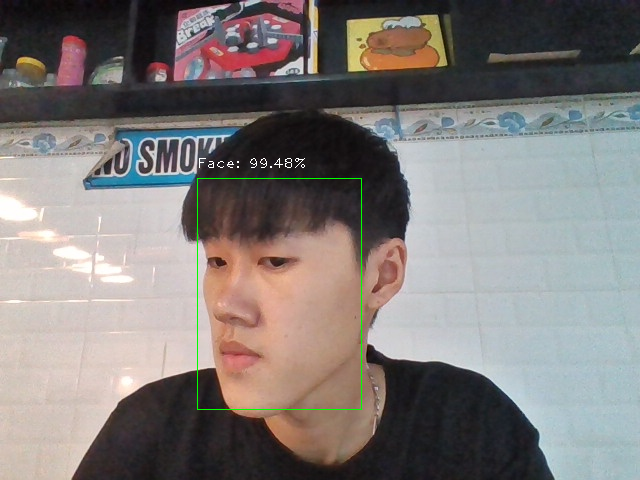

In [40]:

net = cv2.dnn.readNetFromCaffe('/content/drive/MyDrive/test_opencv/model/deploy.prototxt.txt',
                              '/content/drive/MyDrive/test_opencv/model/res10_300x300_ssd_iter_140000_fp16.caffemodel')

blob = cv2.dnn.blobFromImage(img, 1.0, (300, 300), (104, 177, 123), swapRB=False)
net.setInput(blob)
faces = net.forward()
h = img.shape[0]
w = img.shape[1]


print(faces.shape)
print(faces[0, 0, 0, ])

for i in range(0, faces.shape[2]):
    confidence = faces[0,0,i,2]
    if confidence>0.5:
        print(faces[0, 0, i, 3:7])
        startx = int(faces[0, 0, i, 3]*w)
        starty = int(faces[0, 0, i, 4]*h)
        endx = int(faces[0, 0, i, 5]*w)
        endy = int(faces[0, 0, i, 6]*h)
        print(startx, starty, endx, endy)

        cv2.rectangle(img, (startx, starty), (endx, endy), (0, 255, 0),)

        text = 'Face: {:.2f}%'.format(confidence*100);
        cv2.putText(img, text, (startx, starty-10), cv2.FONT_HERSHEY_PLAIN, 1, (255,255,255),)

cv2_imshow(img)